In [1]:
import numpy as np

In [2]:
from skimage import data

In [3]:
from skimage.draw import circle, polygon

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
def rectangeObj(halfwidth, halfheight, centerCoords=(64,128), shape=(128, 256)):
    data = np.zeros(shape=shape, dtype=np.int)
    minheight = centerCoords[0] - halfheight
    maxheight = minheight+ 2* halfheight
    minwidth = centerCoords[1] - halfwidth
    maxwidth = minwidth + 2 * halfwidth
    data[minheight:maxheight , minwidth: maxwidth] = 255
    return data, None, None

In [12]:
def triangleObj(xmin=-30, xmax=50, ymin=-20, ymax=5, centerCoords=(64, 128), shape=(128, 256)):
    data = np.zeros(shape=shape, dtype=np.int)
    llx = centerCoords[1] + xmin
    lrx = centerCoords[1] + xmax
    ly = centerCoords[0] + ymin
    uy = centerCoords[0] + ymax
    print (llx, lrx, ly, uy, centerCoords[0])
    rr, cc = polygon(x=np.array([llx, lrx, centerCoords[1]]), y=np.asarray([ly, ly, uy]))
    data[rr,cc] = 255
    return data, rr, cc

In [13]:
def circleObj(radius, centerCoords=[64,128],shape=(128, 256)):
    data = np.zeros(shape=shape, dtype=int)
    #print(centerCoords)
    rr, cc = circle(centerCoords[0], centerCoords[1], radius)
    data[rr, cc] = 255
    return data, rr, cc

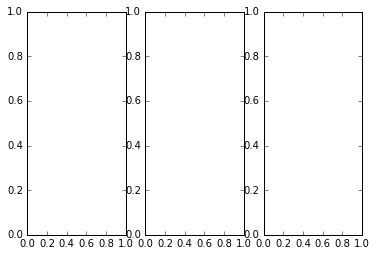

In [14]:
fig, ax = plt.subplots(1, 3)

In [15]:
objs = (rectangeObj(50, 30), circleObj(40), triangleObj())
names = ('rectangle', 'circle', 'triangle')
for i, data in enumerate(objs):
    ax[i].imshow(data[0])
    plt.imsave(names[i] + '.png', data[0])

98 178 44 69 64


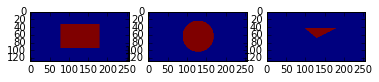

In [16]:
fig

In [20]:
def transform(input_image, trans_type, number=10):
    """
    Parameters
    ----------
    input_image:
    trans_type: 
    number: int, optional, defaults to 10
        number of requested transformations
    """
    return [input_image] * number, trans_type, ['param'] * number

In [17]:
xx = plt.imread('circle.png')

In [38]:
from skimage import transform

In [41]:
def transformAffineBatch(im, trans_type="Affine", nofTransforms=10):
    """
        this function generates nofTransfor random affine transformations and applies them to image im
    """
    listOfTransformedImages = [transform.warp(im,transform.AffineTransform(rotation = np.random.uniform(0,0.1*np.pi))) for i in range(nofTransforms)]
    return(listOfTransformedImages), trans_type, np.random.uniform(0, 0.1* np.pi)

In [60]:
fnames = ['rectangle.png', 'circle.png', 'triangle.png']
num = 10
outfiles = []
labels = []
for fname in fnames:
    inp_img = plt.imread(fname)
    obj = fname.split('.')[0]
    imgs, trans_type, params = transformAffineBatch(inp_img, trans_type='Affine', nofTransforms=num)
    outfilenames = list("_".join([obj, trans_type]) +"_{}.png".format(ind)  for ind in range(len(imgs)))
    print(outfilenames)
    for outfile, img in zip(outfilenames, imgs):
        plt.imsave(outfile, img, cmap='gray')
        outfiles.append(outfile)
        labels.append(obj)

['rectangle_Affine_0.png', 'rectangle_Affine_1.png', 'rectangle_Affine_2.png', 'rectangle_Affine_3.png', 'rectangle_Affine_4.png', 'rectangle_Affine_5.png', 'rectangle_Affine_6.png', 'rectangle_Affine_7.png', 'rectangle_Affine_8.png', 'rectangle_Affine_9.png']
['circle_Affine_0.png', 'circle_Affine_1.png', 'circle_Affine_2.png', 'circle_Affine_3.png', 'circle_Affine_4.png', 'circle_Affine_5.png', 'circle_Affine_6.png', 'circle_Affine_7.png', 'circle_Affine_8.png', 'circle_Affine_9.png']
['triangle_Affine_0.png', 'triangle_Affine_1.png', 'triangle_Affine_2.png', 'triangle_Affine_3.png', 'triangle_Affine_4.png', 'triangle_Affine_5.png', 'triangle_Affine_6.png', 'triangle_Affine_7.png', 'triangle_Affine_8.png', 'triangle_Affine_9.png']


In [61]:
labels

['rectangle',
 'rectangle',
 'rectangle',
 'rectangle',
 'rectangle',
 'rectangle',
 'rectangle',
 'rectangle',
 'rectangle',
 'rectangle',
 'circle',
 'circle',
 'circle',
 'circle',
 'circle',
 'circle',
 'circle',
 'circle',
 'circle',
 'circle',
 'triangle',
 'triangle',
 'triangle',
 'triangle',
 'triangle',
 'triangle',
 'triangle',
 'triangle',
 'triangle',
 'triangle']

In [46]:
outfiles

['rectangle_Affine_0.png',
 'rectangle_Affine_1.png',
 'rectangle_Affine_2.png',
 'rectangle_Affine_3.png',
 'rectangle_Affine_4.png',
 'rectangle_Affine_5.png',
 'rectangle_Affine_6.png',
 'rectangle_Affine_7.png',
 'rectangle_Affine_8.png',
 'rectangle_Affine_9.png',
 'circle_Affine_0.png',
 'circle_Affine_1.png',
 'circle_Affine_2.png',
 'circle_Affine_3.png',
 'circle_Affine_4.png',
 'circle_Affine_5.png',
 'circle_Affine_6.png',
 'circle_Affine_7.png',
 'circle_Affine_8.png',
 'circle_Affine_9.png',
 'triangle_Affine_0.png',
 'triangle_Affine_1.png',
 'triangle_Affine_2.png',
 'triangle_Affine_3.png',
 'triangle_Affine_4.png',
 'triangle_Affine_5.png',
 'triangle_Affine_6.png',
 'triangle_Affine_7.png',
 'triangle_Affine_8.png',
 'triangle_Affine_9.png']

In [55]:
with open('images.csv', 'w') as f:
    for i in range(len(outfiles)):
        f.write(outfiles[i]+','+labels[i]+'\n')